In [2]:
from keras.models import Sequential 
from keras.layers import Dense,Conv2D,MaxPooling2D,UpSampling2D
from keras import Input, Model
from keras.datasets import mnist

import numpy as np
import matplotlib.pyplot as plt

In [3]:
encoding_dim = 15 
input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)

In [4]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 15)                11775     
                                                                 
 dense_1 (Dense)             (None, 784)               12544     
                                                                 
Total params: 24,319
Trainable params: 24,319
Non-trainable params: 0
_________________________________________________________________


In [5]:
encoder = Model(input_img, encoded)
encoded_input = Input(shape=(encoding_dim,))

decoder_layer = autoencoder.layers[-1]

decoder = Model(encoded_input, decoder_layer(encoded_input))

In [6]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [7]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [8]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


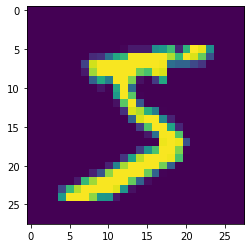

In [9]:
plt.imshow(x_train[0].reshape(28,28))

In [10]:
autoencoder.fit(x_train, x_train, epochs=15, batch_size=256,validation_data=(x_test, x_test))

Epoch 1/15
235/235 [==============================] - 4s 5ms/step - loss: 0.3110 - val_loss: 0.2137
Epoch 2/15
235/235 [==============================] - 1s 4ms/step - loss: 0.1960 - val_loss: 0.1799
Epoch 3/15
235/235 [==============================] - 1s 4ms/step - loss: 0.1721 - val_loss: 0.1625
Epoch 4/15
235/235 [==============================] - 1s 4ms/step - loss: 0.1585 - val_loss: 0.1522
Epoch 5/15
235/235 [==============================] - 1s 4ms/step - loss: 0.1510 - val_loss: 0.1470
Epoch 6/15
235/235 [==============================] - 1s 4ms/step - loss: 0.1470 - val_loss: 0.1441
Epoch 7/15
235/235 [==============================] - 1s 4ms/step - loss: 0.1447 - val_loss: 0.1422
Epoch 8/15
235/235 [==============================] - 1s 4ms/step - loss: 0.1429 - val_loss: 0.1407
Epoch 9/15
235/235 [==============================] - 1s 4ms/step - loss: 0.1415 - val_loss: 0.1393
Epoch 10/15
235/235 [==============================] - 1s 4ms/step - loss: 0.1402 - val_loss: 0.1382

In [11]:
encoded_img = encoder.predict(x_test)

313/313 [==============================] - 0s 1ms/step


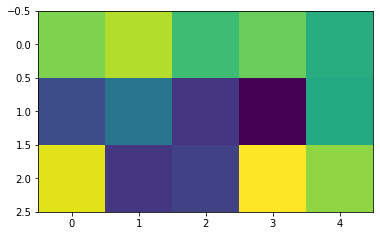

In [12]:
plt.imshow(encoded_img[0].reshape(3,5))

In [13]:
decoded_img = decoder.predict(encoded_img)

313/313 [==============================] - 0s 1ms/step


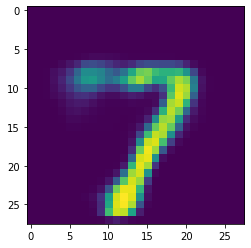

In [ ]:
plt.imshow(decoded_img [0].reshape(28,28))